In [178]:
using Images, VideoIO, Random, Distributions

In [179]:

Random.seed!(42)


# Метод кросс-энтропии
function cross_entropy_method(objective_function, dim, max_iter=100, sample_size=1000, elite_fraction=0.1)
    # Инициализация начального распределения
    vmean = zeros(dim)
    vstd_dev = ones(dim)
    g_best_value = 1000000000
    g_best_sample = randn(dim) .* vstd_dev .+ vmean
    hist = []
    for iter in 1:max_iter
        # Генерация выборки
        samples = [randn(dim) .* vstd_dev .+ vmean for _ in 1:sample_size]
        # Вычисление значений целевой функции
        values = [objective_function(sample) for sample in samples]
        # Выбор элитных образцов
        elite_samples = samples[sortperm(values)[1:floor(Int, sample_size * elite_fraction)]]

        matrix = hcat(elite_samples...)'
        # Обновление параметров распределения
        vmean = vec(mean(matrix, dims=1))
        vstd_dev = vec(std(matrix, dims=1))
        # Вывод текущего лучшего решения
        best_value = minimum(values)
        best_sample = samples[argmin(values)]
        if g_best_value > best_value
            g_best_value = best_value
            g_best_sample = best_sample
        end
        push!(hist, best_sample)
        println("Iteration $iter: Best value = $best_value,")
    end

    return g_best_sample, hist
end

# Пример использования

# best_solution = cross_entropy_method(objective_function, 2)
# println("Best solution found: ", best_solution)

cross_entropy_method (generic function with 4 methods)

[0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616 0.047619047619047616; 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523 0.09523809523809523; 0.14285714285714285 0.14285714285714285 0.14285714285714285 0.14285714285714285 0.14285714285714285 0.14285714285714285 0.14285714285714

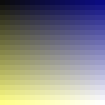

In [180]:

# matrix = [1.0 0.0 1.0; 0.0 0.0 0.0; 1.0 0.0 1.0]
# matrix = [1.0 0.0 1.0 0.0 1.0; 0.0 1.0 0.0 1.0 0.0; 1.0 0.0 1.0 0.0 1.0; 0.0 1.0 0.0 1.0 0.0; 1.0 0.0 1.0 0.0 1.0]
# matrix = [0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#  0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0;
#   ]
# matrix = [(i + j) / (2 * 21) for i in 1:21, j in 1:21]
r = [i / 21.0 for i in 1:21, j in 1:21]
g = [i / 21.0 for i in 1:21, j in 1:21]
b = [(i + j) / (2 * 21.0) for i in 1:21, j in 1:21]
img = zeros(RGB{Float32}, 21, 21)
matrix = r
for i in 1:21
    for j in 1:21
        img[i,j] = RGB(r[i,j], g[i,j], b[i,j])
    end
end

n = size(matrix)[1]
# img = RGB.(matrix)
println(matrix)
println(vec(matrix'))

display(img)

In [181]:
function objective_function(x)
    v = vec(r')
    return sqrt(sum([(v[i]-x[i]) for i in 1:length(v)]))
end
rgen_image, rhist = cross_entropy_method(objective_function, length(vec(r)))
function objective_function1(x)
    v = vec(g')
    return sqrt(sum([(v[i]-x[i])^2 for i in 1:length(v)]))
end
ggen_image, ghist = cross_entropy_method(objective_function1, length(vec(g)))
function objective_function2(x)
    v = vec(b')
    return sqrt(sum([(v[i]-x[i])^2 for i in 1:length(v)]))
end
bgen_image, bhist = cross_entropy_method(objective_function2, length(vec(b)))

Iteration 1: Best value = 13.17625115298349,
Iteration 2: Best value = 10.760700412902967,
Iteration 3: Best value = 9.87220824192125,
Iteration 4: Best value = 7.1942871920309095,
Iteration 5: Best value = 4.257985696830786,


LoadError: DomainError with -14.084820698359533:
sqrt was called with a negative real argument but will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

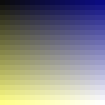

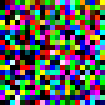

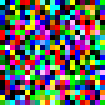

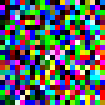

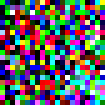

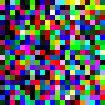

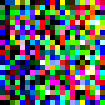

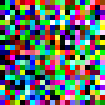

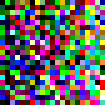

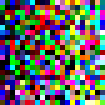

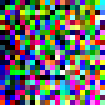

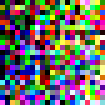

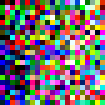

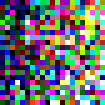

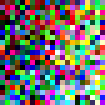

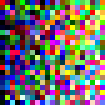

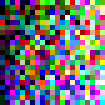

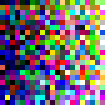

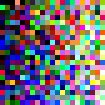

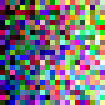

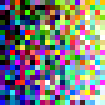

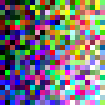

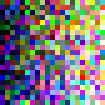

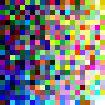

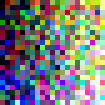

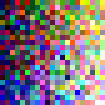

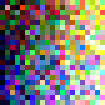

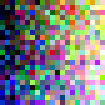

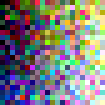

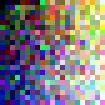

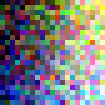

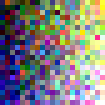

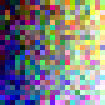

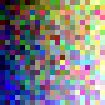

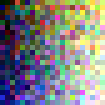

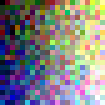

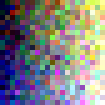

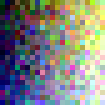

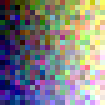

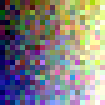

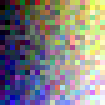

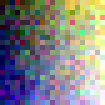

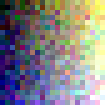

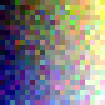

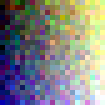

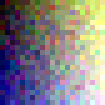

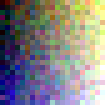

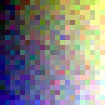

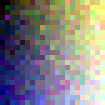

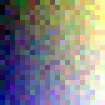

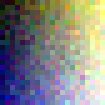

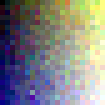

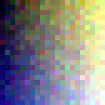

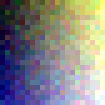

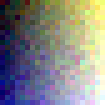

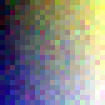

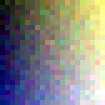

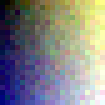

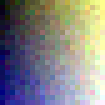

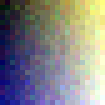

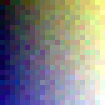

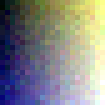

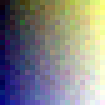

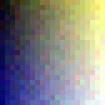

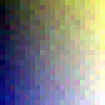

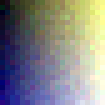

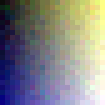

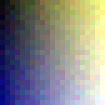

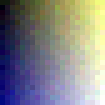

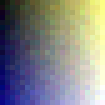

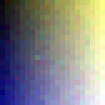

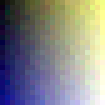

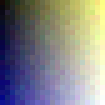

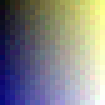

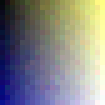

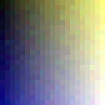

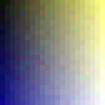

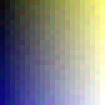

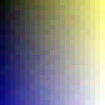

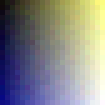

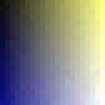

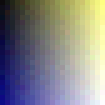

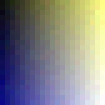

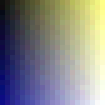

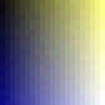

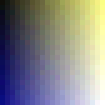

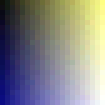

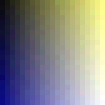

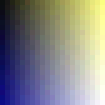

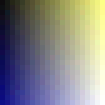

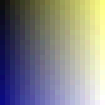

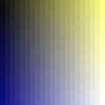

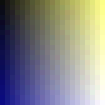

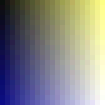

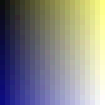

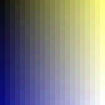

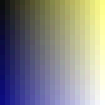

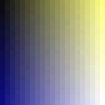

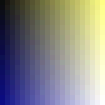

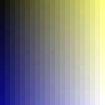

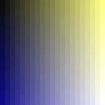

In [ ]:

display(img)
frames = []
for i in 1:length(hist)
    img = zeros(RGB{Float32}, 21, 21)
    r = Gray.(reshape(rhist[i], n, n))
    g = Gray.(reshape(ghist[i], n, n))
    b = Gray.(reshape(bhist[i], n, n))
    for i in 1:21
        for j in 1:21
            img[i,j] = RGB(r[i,j], g[i,j], b[i,j])
        end
    end
    display(img)
    push!(frames, reshape(gen_image, n, n))
end
